In [161]:
# default_exp dataloader

In [200]:
#export

import torch
import torchvision
import torchvision.transforms as transforms

import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from PIL import Image

In [111]:
eg_path = Path('/home/jjmachan')
eg_path = Path(eg_path)
eg_path

PosixPath('/home/jjmachan')

In [69]:
dataPath = Path.cwd()/'data/cifar-10-batches-py/'
data_batches = os.listdir(data)[:5] + [os.listdir(data)[7]]
data_batches

['data_batch_5',
 'data_batch_4',
 'data_batch_1',
 'data_batch_3',
 'data_batch_2',
 'test_batch']

In [168]:
#export
# py fun to load data 
def unpickle_cifar(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [113]:
cifar_data = dict()
for batch_file in data_batches:
    cifar_data[batch_file] = unpickle_cifar(dataPath/batch_file)

In [118]:
arr = np.empty((0,3072), np.uint8)
arr

array([], shape=(0, 3072), dtype=uint8)

In [132]:
labels_tr = []
images_tr = np.empty((0,3072), np.uint8)
for batch in cifar_data:
    print('appending: ',batch)
    image_batch = cifar_data[batch][b'data']
    images_tr = np.append(images_tr, image_batch, axis=0)
    label_batch = cifar_data[batch][b'labels']
    labels_tr += label_batch

appending:  data_batch_5
appending:  data_batch_4
appending:  data_batch_1
appending:  data_batch_3
appending:  data_batch_2
appending:  test_batch


In [133]:
labels_tr

[1,
 8,
 5,
 1,
 5,
 7,
 4,
 3,
 8,
 2,
 7,
 2,
 0,
 1,
 5,
 9,
 6,
 2,
 0,
 8,
 2,
 7,
 0,
 4,
 1,
 7,
 7,
 4,
 4,
 9,
 9,
 6,
 2,
 4,
 1,
 6,
 4,
 9,
 6,
 6,
 9,
 6,
 9,
 9,
 5,
 7,
 1,
 6,
 8,
 2,
 9,
 5,
 9,
 5,
 3,
 7,
 1,
 3,
 3,
 9,
 1,
 7,
 8,
 9,
 7,
 4,
 3,
 4,
 9,
 5,
 8,
 4,
 9,
 3,
 6,
 1,
 1,
 4,
 3,
 9,
 9,
 1,
 9,
 9,
 2,
 4,
 3,
 2,
 4,
 7,
 1,
 5,
 1,
 8,
 6,
 3,
 6,
 3,
 4,
 4,
 9,
 9,
 9,
 7,
 0,
 5,
 7,
 7,
 4,
 8,
 8,
 4,
 2,
 0,
 5,
 2,
 4,
 9,
 1,
 7,
 7,
 4,
 8,
 8,
 8,
 0,
 2,
 3,
 6,
 3,
 9,
 0,
 8,
 2,
 2,
 4,
 8,
 8,
 1,
 8,
 5,
 7,
 6,
 0,
 9,
 1,
 4,
 8,
 2,
 1,
 0,
 5,
 1,
 6,
 5,
 3,
 4,
 9,
 9,
 0,
 3,
 5,
 4,
 2,
 6,
 3,
 9,
 4,
 9,
 8,
 6,
 4,
 1,
 1,
 9,
 8,
 2,
 2,
 1,
 8,
 5,
 9,
 7,
 8,
 1,
 1,
 4,
 2,
 4,
 2,
 0,
 8,
 8,
 0,
 0,
 4,
 3,
 0,
 7,
 7,
 6,
 1,
 6,
 7,
 1,
 5,
 6,
 1,
 7,
 2,
 4,
 0,
 2,
 2,
 5,
 9,
 3,
 2,
 1,
 4,
 1,
 2,
 9,
 8,
 5,
 2,
 3,
 3,
 4,
 9,
 7,
 2,
 3,
 9,
 7,
 6,
 2,
 9,
 7,
 5,
 4,
 0,
 8,
 7,
 2,
 0,
 3,
 5,
 1,
 3,


In [139]:
labels = cifar_data['data_batch_1'][b'labels']
images = cifar_data['data_batch_1'][b'data']

images = images_tr.reshape(-1,3,32,32).transpose(0,2,3,1)
images.shape
labels = labels_tr

In [135]:
images.dtype

dtype('uint8')

In [86]:
#export
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [96]:
#export
def normalize(x):
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x - min_val) / (max_val - min_val)
    return x

In [209]:
idx = 24223

def show_image(img, label):
    img = img.transpose(1,2,0)
    plt.subplot(1,2,1)
    plt.imshow(normalize(img.numpy()))
    plt.title(class_names[label])

    plt.subplot(1,2,2)
    plt.imshow(img.numpy())
    plt.title(class_names[label])

    plt.show()

In [220]:
#export

class one_hot_encoding(object):
    def __call__(self, sample):
        encoded = np.zeros((len(labels), 10))

        for idx,val in enumerate(sample):
            encoded[idx][val] = 1
        return encoded



In [236]:
#export

class CifarDownloadedDataset(Dataset):
    """
    This is the Cifar10 dataset loader from the downloaded section.
    """
    
    def __init__(self, root_dir, train=True, transform=None, target_transform=None):
        """
        Args:
            root_dir (string): Path of the cifar10 data_batches.
            transforms (callable, optional): Optional transforms to 
                be applied on a sample.
        """
        
        self.root_dir = Path(root_dir)
        self.transform = transform
        self.target_transform = target_transform
        self.train_batches = ['data_batch_5',
                              'data_batch_4',
                              'data_batch_1',
                              'data_batch_3',
                              'data_batch_2',]
        self.test_batches = ['test_batch']
        
        self.labels = []
        self.data = np.empty((0,3072), np.uint8)
        
        cifar_data = dict()
        
        if train:
            data_batches=self.train_batches
        else:
            data_batches=self.test_batches
            
        for batch_file in data_batches:
            cifar_data[batch_file] = unpickle_cifar(self.root_dir/batch_file)
            
        for batch in cifar_data:
            print('appending: ',batch)
            image_batch = cifar_data[batch][b'data']
            self.data = np.append(self.data, image_batch, axis=0)
            label_batch = cifar_data[batch][b'labels']
            self.labels += label_batch
        
        # convert self.data to the NHWC format
        self.data = self.data.reshape(-1,3,32,32).transpose(0,2,3,1)
    
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        image, label = self.data[idx], self.labels[idx]
        
        # to make the Dataloader consitant with all other
        # pytorch dataloaders we return a PIL Image
        
        image = Image.fromarray(image)
        
        if self.transform is not None:
            image = self.transform(image)
        
        if self.target_transform is not None:
            label = self.target_transform(label)
            
        return image,label

In [232]:
composed = transforms.Compose([one_hot_encoding])
cifar10 = CifarDownloadedDataset('./data/cifar-10-batches-py/',
                                 train=False, 
                                 transform=transform,
                                 target_transform=None,)

trainloader = torch.utils.data.DataLoader(cifar10, batch_size=4,
                                          shuffle=True, num_workers=2)

appending:  test_batch


In [233]:
cifar10[2]

(tensor([[[ 0.2392,  0.2392,  0.0902,  ...,  0.7882,  0.8588,  0.8667],
          [ 0.3333,  0.3490,  0.1843,  ...,  0.8196,  0.9294,  0.9294],
          [ 0.3647,  0.3804,  0.2314,  ...,  0.8039,  0.9608,  0.9216],
          ...,
          [-0.7569, -0.7647, -0.7961,  ..., -0.7098, -0.9294, -0.9686],
          [-0.8196, -0.7882, -0.8039,  ..., -0.8510, -0.9686, -0.9608],
          [-0.7804, -0.7647, -0.7490,  ..., -0.9608, -0.9686, -0.9451]],
 
         [[ 0.4902,  0.4667,  0.3020,  ...,  0.8118,  0.8745,  0.8902],
          [ 0.5686,  0.5608,  0.3804,  ...,  0.8196,  0.9294,  0.9373],
          [ 0.5765,  0.5686,  0.4039,  ...,  0.7961,  0.9529,  0.9137],
          ...,
          [-0.6863, -0.6941, -0.7255,  ..., -0.6863, -0.8980, -0.9451],
          [-0.7333, -0.7020, -0.7176,  ..., -0.8431, -0.9529, -0.9451],
          [-0.6784, -0.6627, -0.6471,  ..., -0.9529, -0.9608, -0.9373]],
 
         [[ 0.7412,  0.7098,  0.5216,  ...,  0.8353,  0.9059,  0.9294],
          [ 0.7961,  0.7725,

In [ ]:
class ToTensor(object):
    def __call__(self, sample)

In [201]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

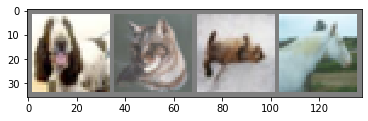

  dog   cat   cat horse


In [235]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % class_names[labels[j]] for j in range(4)))